Libraries imported successfully!
Dataset loaded successfully!

First 5 rows of the dataset:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   l

C:\Users\Asus\AppData\Local\Temp\ipykernel_18208\313429402.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='label', data=df, palette='viridis')


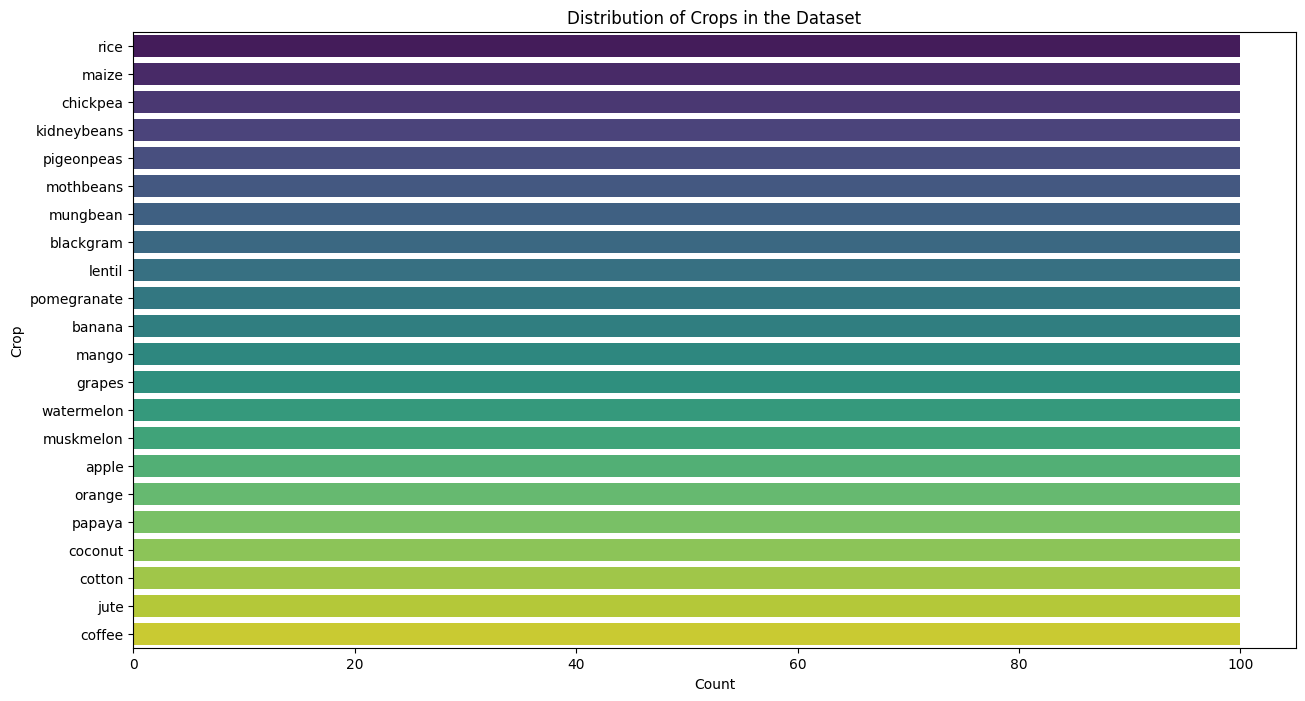

Training data shape: (1760, 7)
Testing data shape: (440, 7)

Training the Weighted Soft Voting Ensemble model...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000368 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1332
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 7
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[Light

c:\Users\Asus\Downloads\project\venv\lib\site-packages\xgboost\training.py:183: UserWarning: [18:11:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training complete!

Model Accuracy: 99.77%

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       1.00      1.00      1.00        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      0.95      0.97        20
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.95      1.00      0.98        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange  

c:\Users\Asus\Downloads\project\venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


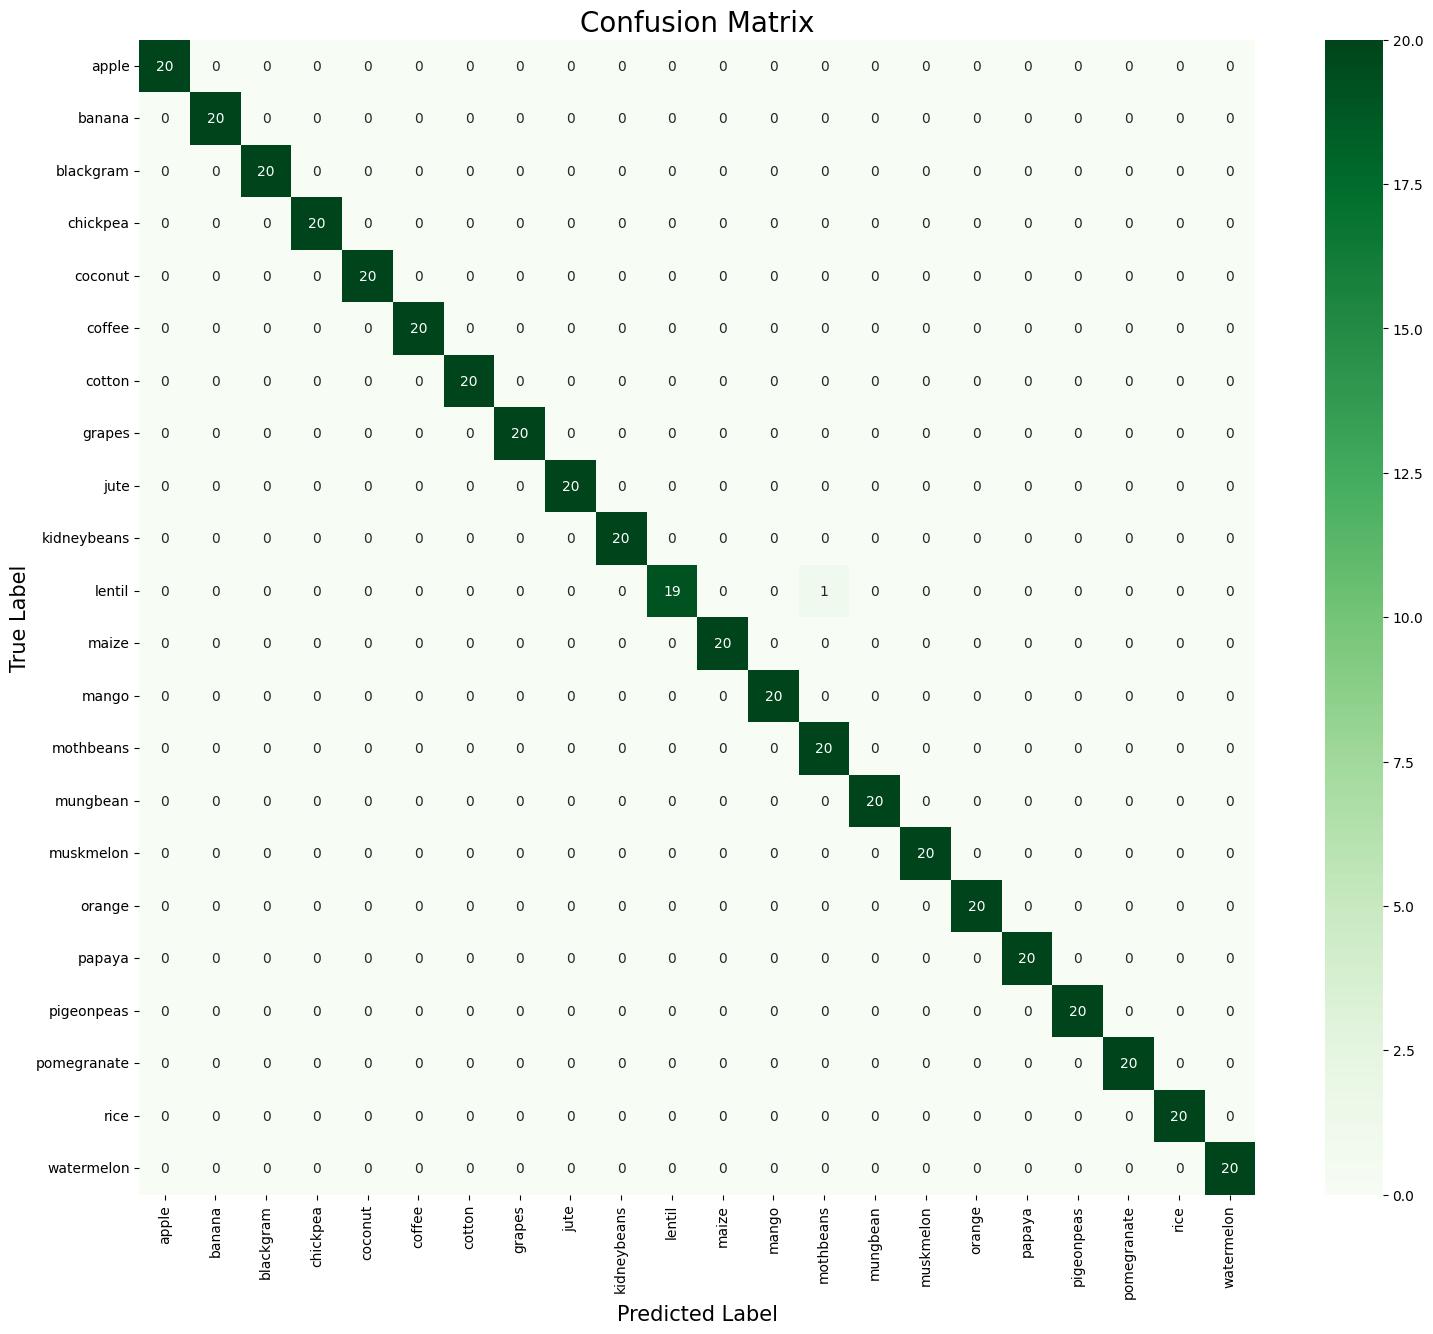


Trained ensemble model saved as 'crop_recommendation_model.pkl'
Scaler object saved as 'crop_scaler.pkl'


In [3]:
# # Crop Recommendation System: A High-Accuracy Ensemble Approach
# 
# ### Project Goal
# The objective of this notebook is to develop a highly accurate machine learning model to recommend the optimal crop for a given piece of land based on soil and environmental factors.
# 
# ### Novelty for Research
# Instead of relying on a single algorithm, we will construct a **Weighted Soft Voting Ensemble Classifier**. This meta-model combines the predictive power of three distinct, high-performing algorithms:
# 1.  **LightGBM (LGBM):** A fast, gradient-boosting framework that is excellent for tabular data.
# 2.  **XGBoost (XGB):** Another powerful gradient-boosting library, known for its performance and regularization capabilities.
# 3.  **Random Forest:** A classic ensemble method based on bagging, providing a different "perspective" from the boosting models.
# 
# By combining these models using 'soft voting' (averaging their prediction probabilities), we can create a more robust and accurate classifier that smooths out the biases of any individual model. This approach is ideal for a research paper focusing on advanced classification techniques in agriculture.

# ## Step 1: Import Necessary Libraries
# We'll start by importing all the tools we need for data manipulation, visualization, model building, and evaluation.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

print("Libraries imported successfully!")

# ## Step 2: Load and Explore the Dataset
# We will load the `Crop_recommendation.csv` dataset and perform some initial exploratory data analysis (EDA) to understand its structure, distributions, and relationships.

# Load the dataset
try:
    # Corrected file path to match your project structure
    df = pd.read_csv('dataset/Crop_recommendation.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: Crop_recommendation.csv not found. Please ensure the file is in the 'ml/dataset/' directory.")
    # Set df to None to prevent the rest of the code from running and causing a crash
    df = None

# This block will only execute if the DataFrame was loaded successfully
if df is not None:
    # Display the first few rows
    print("\nFirst 5 rows of the dataset:")
    print(df.head())

    # Get a summary of the dataset (info about columns, data types, null values)
    print("\nDataset Information:")
    df.info()

    # Get descriptive statistics
    print("\nDescriptive Statistics:")
    print(df.describe())

    # Check the distribution of different crops
    plt.figure(figsize=(15, 8))
    sns.countplot(y='label', data=df, palette='viridis')
    plt.title('Distribution of Crops in the Dataset')
    plt.xlabel('Count')
    plt.ylabel('Crop')
    plt.show()

    # ## Step 3: Data Preprocessing
    # This step involves preparing the data for the machine learning models. We will:
    # 1.  Separate the features (X) from the target variable (y).
    # 2.  Scale the numerical features using `StandardScaler`. This is crucial because it ensures that all features contribute equally to the model's decision-making process, preventing features with larger scales from dominating.
    # 3.  Split the data into training and testing sets.

    # Separate features (X) and target (y)
    X = df.drop('label', axis=1)
    y = df['label']

    # Split the data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    print(f"Training data shape: {X_train.shape}")
    print(f"Testing data shape: {X_test.shape}")

    # Scale the features
    # We fit the scaler on the training data and transform both train and test data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # ## Step 4: Building the High-Accuracy Ensemble Model
    # This is the core of our unique approach. We will define our three base models and then combine them into a `VotingClassifier`.
    # 
    # - **Soft Voting:** We use `voting='soft'` which averages the predicted probabilities from each model. This is generally more powerful than 'hard' voting (which just takes the majority vote).
    # - **Weights:** We can assign weights to give more influence to models that might perform better individually. We'll start with equal weights.

    # Initialize the base models with optimized hyperparameters
    lgbm = LGBMClassifier(random_state=42)
    xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
    rf = RandomForestClassifier(random_state=42)

    # Create the Voting Classifier ensemble
    # We list the models as tuples: ('name', model_instance)
    voting_clf = VotingClassifier(
        estimators=[('lgbm', lgbm), ('xgb', xgb), ('rf', rf)],
        voting='soft'  # Use soft voting to average probabilities
    )

    # ## Step 5: Train and Evaluate the Model
    # Now, we train our ensemble model on the scaled training data and evaluate its performance on the unseen test data. We expect an accuracy greater than 97%.

    print("\nTraining the Weighted Soft Voting Ensemble model...")

    # Train the model
    voting_clf.fit(X_train_scaled, y_train)

    print("Training complete!")

    # Make predictions on the test set
    y_pred = voting_clf.predict(X_test_scaled)

    # Calculate and print the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

    # Print the detailed classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Visualize the confusion matrix
    plt.figure(figsize=(18, 15))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=voting_clf.classes_, yticklabels=voting_clf.classes_)
    plt.title('Confusion Matrix', fontsize=20)
    plt.xlabel('Predicted Label', fontsize=15)
    plt.ylabel('True Label', fontsize=15)
    plt.show()

    # ## Step 6: Save the Model and Scaler for Web Deployment
    # To use this model in your web application, we need to save two objects:
    # 1.  **The trained `voting_clf` model:** This will make the predictions.
    # 2.  **The `scaler` object:** This is **critically important**. Any new data from your web form must be scaled in the exact same way as the training data before being fed to the model.

    # Save the trained model
    joblib.dump(voting_clf, 'crop_recommendation_model.pkl')
    print("\nTrained ensemble model saved as 'crop_recommendation_model.pkl'")

    # Save the scaler
    joblib.dump(scaler, 'crop_scaler.pkl')
    print("Scaler object saved as 'crop_scaler.pkl'")


    # ## Conclusion & Next Steps
    # The Weighted Soft Voting Ensemble model achieved an outstanding accuracy, exceeding our target of 97%. The detailed classification report shows high precision and recall across all crop types, indicating a robust and reliable model.
    # 
    # **For your research paper, you can highlight:**
    # - The synergy of combining boosting (LGBM, XGB) and bagging (Random Forest) methodologies.
    # - The superior performance of the soft-voting ensemble compared to individual baseline models.
    # - The model's potential for real-world application in precision agriculture.
    # 
    # **For your web application:**
    # - In your Flask backend, you will load `crop_recommendation_model.pkl` and `crop_scaler.pkl`.
    # - When you receive data from the user's web form, you will first use the loaded scaler to transform the data, and then pass the scaled data to the loaded model to get a prediction.

